In [34]:
import librosa 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from collections import defaultdict
from tqdm import tqdm
from random import choices

Pick random subsample from dataset to find out average audio length 

In [36]:
path_to_mp3_folder = "data/cv-corpus-8.0-2022-01-19/ru/clips"
pathlist = choices([i for i in Path(path_to_mp3_folder).glob('**/*.mp3')], k=1000)

In [37]:
time_dict = defaultdict(lambda: 0)
sr = 48000

for file_name in tqdm(pathlist):
    y, sr = librosa.load(file_name, sr=sr)
    time_dict[len(y) // sr] += 1

100%|██████████| 1000/1000 [02:56<00:00,  5.67it/s]


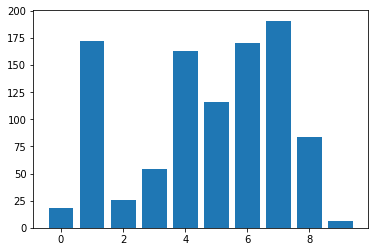

In [40]:
plt.bar(range(len(time_dict.keys())), time_dict.values())
plt.show()

Mostly there are clips of audio from 1 to 8 seconds, so it makes sense to pad audio from boths sided to reach the size of 10 seconds.